In [30]:
!pip install pandas
!pip install scikit-learn

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, Birch
from pandas.plotting import table

In [10]:
data = pd.read_csv('project_files/openML_banknote_authentication_dataset.csv')
data.head()

,id,V1,V2,V3,V4,Class
0,1,3.62160,8.6661,-2.8073,-0.44699,1
1,2,4.54590,8.1674,-2.4586,-1.46210,1
2,3,3.86600,-2.6383,1.9242,0.10645,1
3,4,3.45660,9.5228,-4.0112,-3.59440,1
4,5,0.32924,-4.4552,4.5718,-0.98880,1


In [16]:
boxplot_image = plt.figure()
boxplot = data.boxplot(column=['V1', 'V2'])
plt.title("V1 and V2 boxplot")
boxplot_image.savefig("images/boxplot_image.png")
plt.close()

### This creates a boxplot to detect any outliers from the dataset from the two features V1 and V2

### Create an image to save the description of the simplified table

In [66]:
# normalise the data
normed_data = (data - data.min())/(data.max() - data.min())
normed_data.head()
# actually correct classing
label_name = ['genuine', 'fake']

for index, label in enumerate(label_name):
    temp = normed_data[ normed_data['Class'] == index ]
    plt.scatter(temp['V1'], temp['V2'], label=label, alpha=0.4)
    
plt.legend(loc="lower right")
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Banknote authentication correct labels')
plt.savefig("images/banknote_authentication_correct_labels.png")
plt.close()

### Map points from the dataset with labels of the genuine and fake banknotes

In [69]:
kmeans_res = KMeans(n_clusters=2)
cluster_groups = kmeans_res.fit_predict(normed_data[['V1', 'V2']])
normed_data['Clusters'] = cluster_groups
inaccurate = normed_data[ normed_data['Class'] != normed_data['Clusters'] ]
accuracy = (len(normed_data) - len(inaccurate))/(len(normed_data))*100
print(f'accuracy: {accuracy}')

accuracy: 87.09912536443149


In [64]:
# plot Kmeans
label_name_pred = ['predicted genuine', 'predicted fake']
for index, label in enumerate(label_name_pred):
    temp = normed_data[ normed_data['Clusters'] == index ]
    plt.scatter(temp['V1'], temp['V2'], label=label, alpha=0.4)
    
plt.legend(loc="lower right")
plt.xlabel('V1')
plt.ylabel('V2')
plt.title(f'Prediction of K-means algorithm, accuracy: {round(accuracy,2)}%')

plt.tight_layout()
plt.savefig("images/Kmeans_prediction.png")
plt.close()

In [73]:
# Plot the inaccuracies of kmeans clustering
inaccurate_kmean = normed_data[ normed_data['Class'] != normed_data['Clusters'] ]
plt.scatter(normed_data['V1'], normed_data['V2'],
            alpha=0.4, c=normed_data['Class'], cmap="coolwarm",
           label=None)

plt.scatter(inaccurate_kmean['V1'], inaccurate_kmean['V2'],
            c='c', alpha=0.7, label="inaccuracies")
    
plt.legend(loc="lower right")
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('K-means inaccuracies')

plt.savefig("images/Kmeans_inaccuracies_over_accurate.png")
plt.close()

In [74]:
inaccurate_kmean = normed_data[ normed_data['Class'] != normed_data['Clusters'] ]
plt.scatter(normed_data['V1'], normed_data['V2'],
            alpha=0, c=normed_data['Class'], cmap="coolwarm",
           label=None)

plt.scatter(inaccurate_kmean['V1'], inaccurate_kmean['V2'],
            c='c', alpha=0.7, label="inaccuracies")
    
plt.legend(loc="lower right")
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('K-means inaccuracies')

plt.savefig("images/Kmeans_inaccuracies.png")
plt.close()

In [79]:
curse_of_dimensionality_res = KMeans(n_clusters=2)
cluster_groups_curse = curse_of_dimensionality_res.fit_predict(normed_data[['V1', 'V2','V3','V4']])
normed_data['Clusters_curse'] = cluster_groups_curse
inaccurate_curse = normed_data[ normed_data['Class'] != normed_data['Clusters_curse'] ]
accuracy_curse = (len(normed_data) - len(inaccurate_curse))/(len(normed_data))*100
print(f'accuracy: {accuracy_curse}')

accuracy: 57.5801749271137


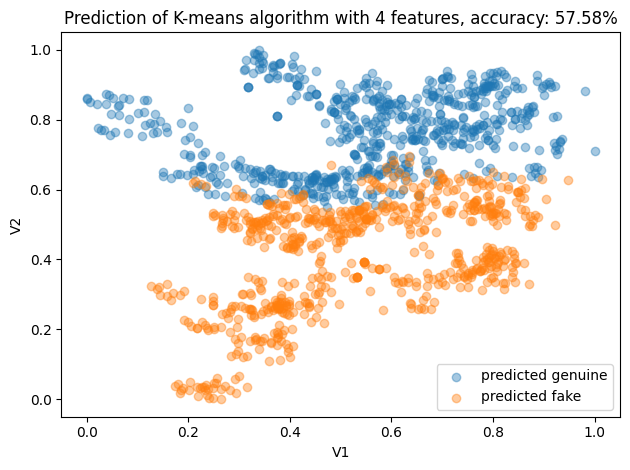

In [80]:
# plot Kmeans with more features
for index, label in enumerate(label_name_pred):
    temp = normed_data[ normed_data['Clusters_curse'] == index ]
    plt.scatter(temp['V1'], temp['V2'], label=label, alpha=0.4)
    
plt.legend(loc="lower right")
plt.xlabel('V1')
plt.ylabel('V2')
plt.title(f'Prediction of K-means algorithm with 4 features, accuracy: {round(accuracy_curse,2)}%')

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
inaccurate_kmean = normed_data[ normed_data['Class'] != normed_data['Clusters_curse'] ]
plt.scatter(normed_data['V1'], normed_data['V2'],
            alpha=0.4, c=normed_data['Class'], cmap="coolwarm",
           label=None)

plt.scatter(inaccurate_kmean['V1'], inaccurate_kmean['V2'],
            c='c', alpha=0.7, label="inaccuracies")
    
plt.legend(loc="lower right")
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('K-means inaccuracies')

plt.show()
plt.close()